# 타이타닉 캐글 과제 

캐글 사이트 출처 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic/data?select=train.csv

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#경고 메세지 숨기기
import warnings
warnings.filterwarnings('ignore')

In [5]:
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

In [3]:
#csv 파일 불러오기 
data = pd.read_csv("../data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#데이터 결측값 확인하기 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

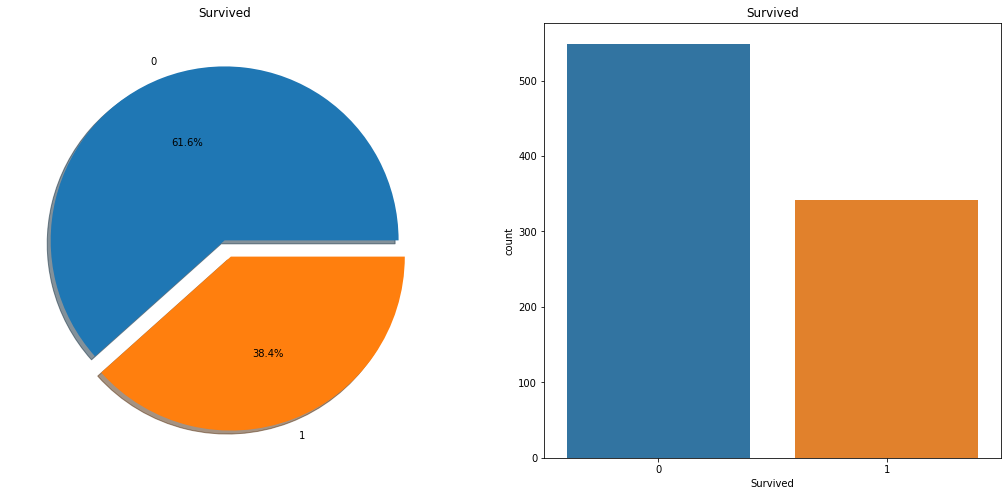

In [22]:
#생존자 성별 파이, 막대 그래프 그리기 
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                         autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [10]:
#성별 생존자수 나누기
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

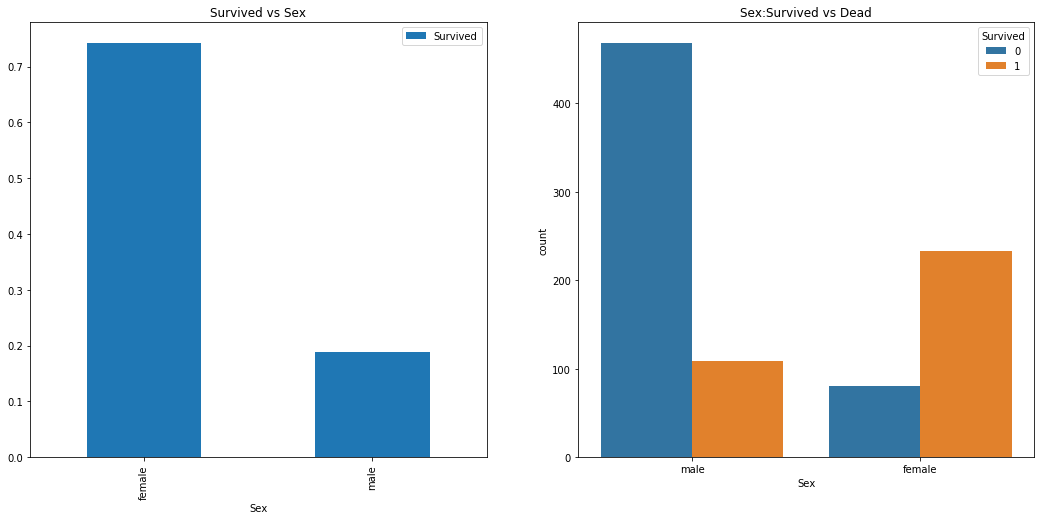

In [31]:
#성별 생존자수 비율 막대 그래프 
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#성별 생존자수 ,사망자수 인원 비교 막대 그래프 
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


In [38]:
#티켓 클래스 별 생존여부 표 (한 줄로 쭉 쳐야 됨)
#범주형 데이터 비교할 때 좋음
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


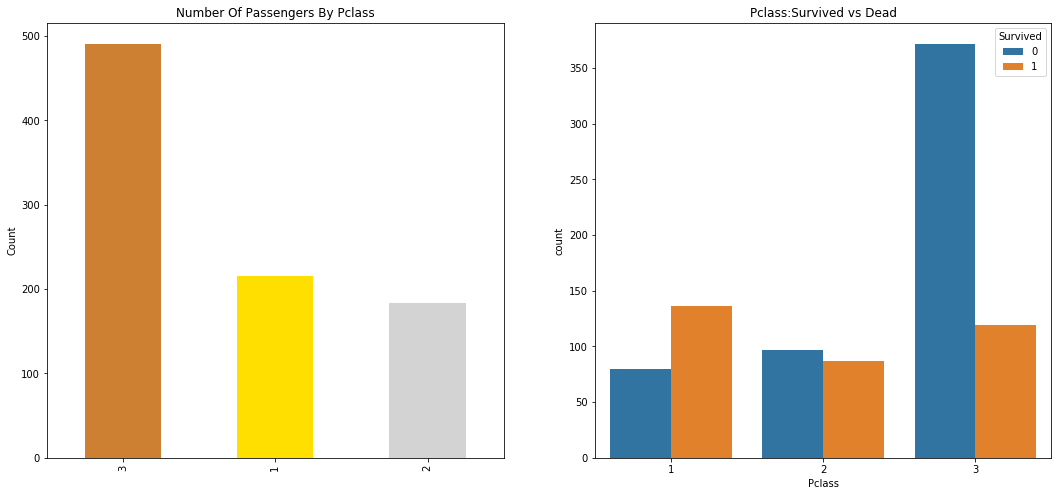

In [42]:
#등급별 좌석 생존자 수 막대 그래프 
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')

#등급별 좌석 생존자수 , 사망자수 비교 막대 그래프 
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [45]:
#등급별 좌석 성별 생존자수 
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

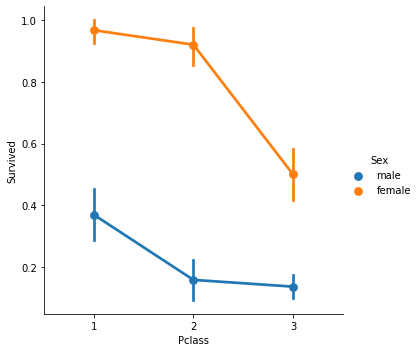

In [44]:
# 등급별 좌석 성별 생존비율 라인 그래프 
sns.factorplot('Pclass','Survived', hue= 'Sex', data=data)
plt.show()

In [51]:
#타이타닉호에서 가장 많은 나이는? 
print("Oldest Passenger was of:" , data["Age"].max(),"Years")

#타이타닉호에서 가장 어린 나이는? 
print('Youngest Passenger was of:', data['Age'].min(),'Yeras')

#타이타닉호 승객들 평균 나이는? 
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Yeras
Average Age on the ship: 29.69911764705882 Years


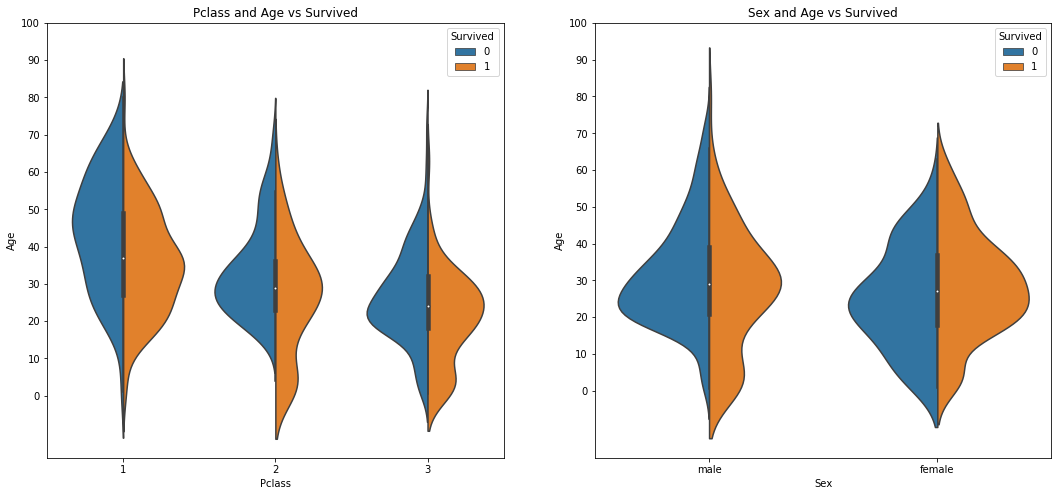

In [52]:
#등급별 좌석 나이대 별 생존 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

#성별 나이대 별 생존 그래프 
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [56]:
#이 부분은 확실히 모르겠습니다. 
#성별, 직업별 생존자수
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [55]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [57]:
#원하는 이름으로 바꾸기 
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']
                        ,inplace=True)


In [58]:
#마스터, 미스, 미스터, 미세스, 그외 평균나이
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [62]:
#세대별?? 나이 기준 설정하기 
data.loc[(data.Age.isnull())&(data.Initial=="Mr"),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=="Mrs"),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=="Master"),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=="Miss"),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=="Other"),'Age']=46

In [64]:
#세대별 나이 기준 결측값 확인 
data.Age.isnull().any()

False

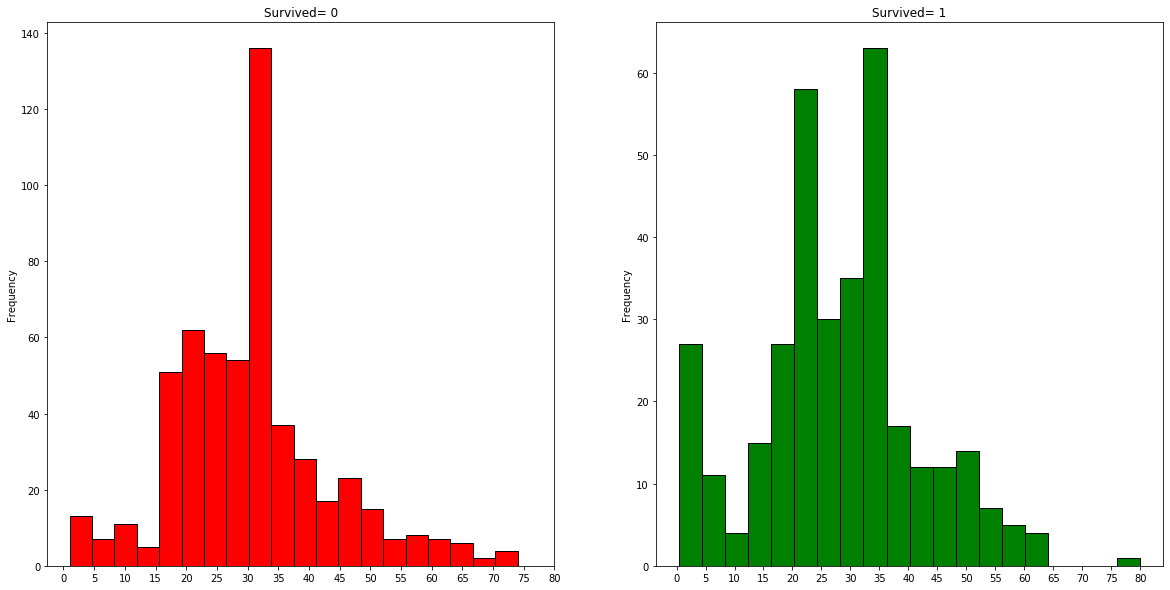

In [83]:
#생존자별 나이대와 사망자별 나이대 비교 그래프
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

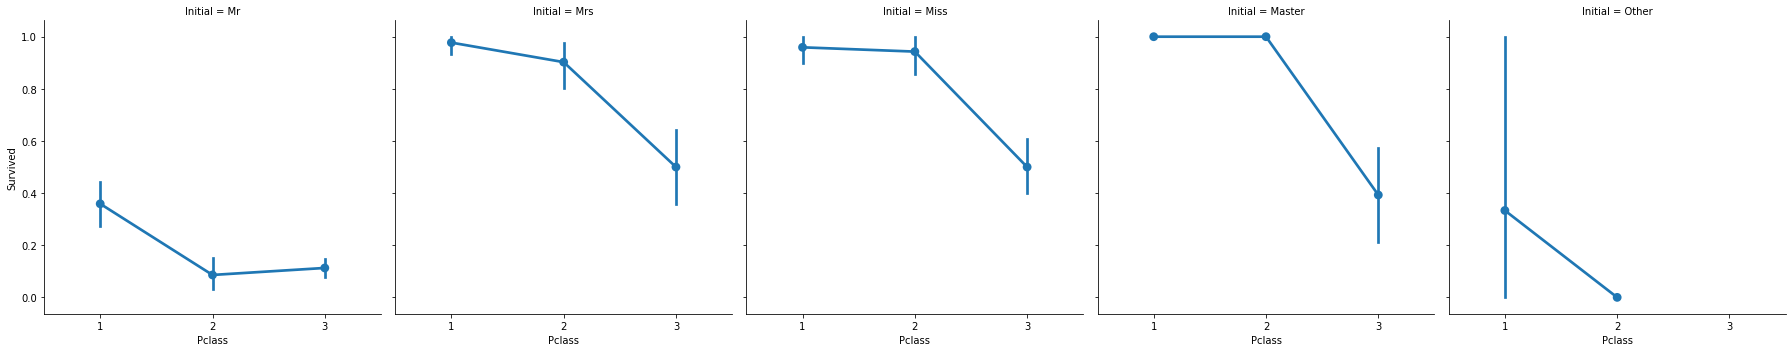

In [84]:
#마스터, 미스, 미스터, 미세스, 그외 사람들 생존률 그래프?!
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [87]:
#선착장별 등급 좌석 성별 생존자수 
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

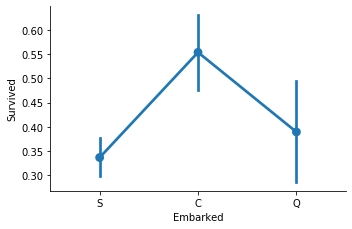

In [92]:
#선착장별 생존사수 비율 
sns.factorplot('Embarked','Survived',data=data)
fig= plt.gcf()
fig.set_size_inches(5,3)
plt.show()

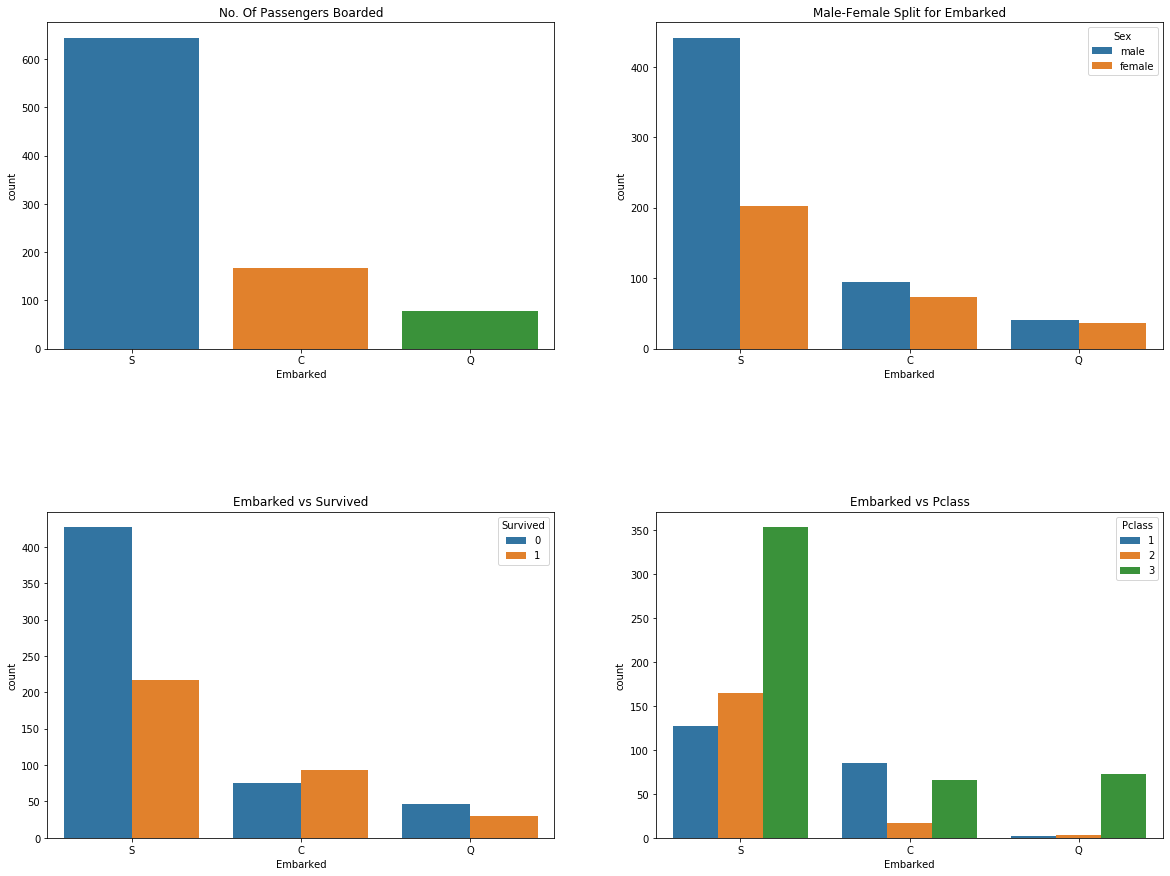

In [100]:
#선착장별 탑승한 승객수 그래프 
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# 선착장별 남녀 탑승객 수 그래프  
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

#선착장별 생존자수, 사망자수 그래프 
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

#등급별 좌석 탑승객을 선착장별로 나눈 그래프
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) 
plt.show()

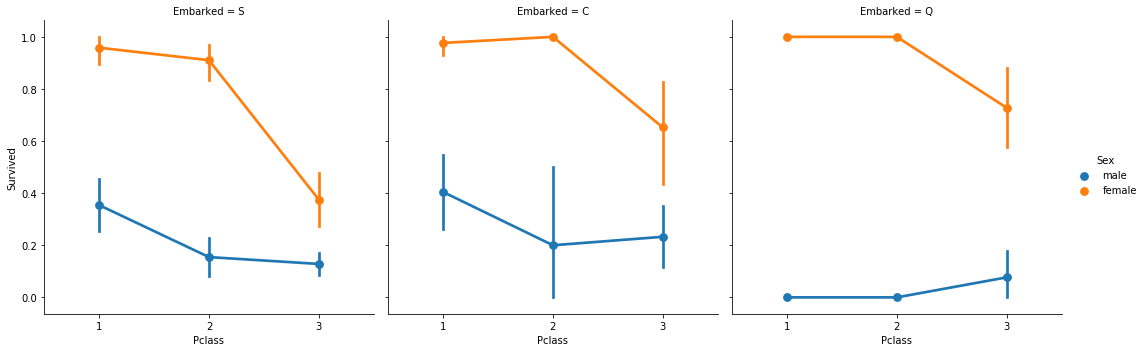

In [102]:
#선착장별 탑승객 등급별 좌석 생존율 그래프 
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [103]:
#최대 승객들이 S 선착장에서 탐승하여 선착장 결측값은 S로 대체 
data['Embarked'].fillna('S',inplace=True)

In [104]:
#선착장 결측값 확인 
data.Embarked.isnull().any()

False

In [9]:
#함께 탑승한 형제 또는 배우자의 수
#0명~8명 
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


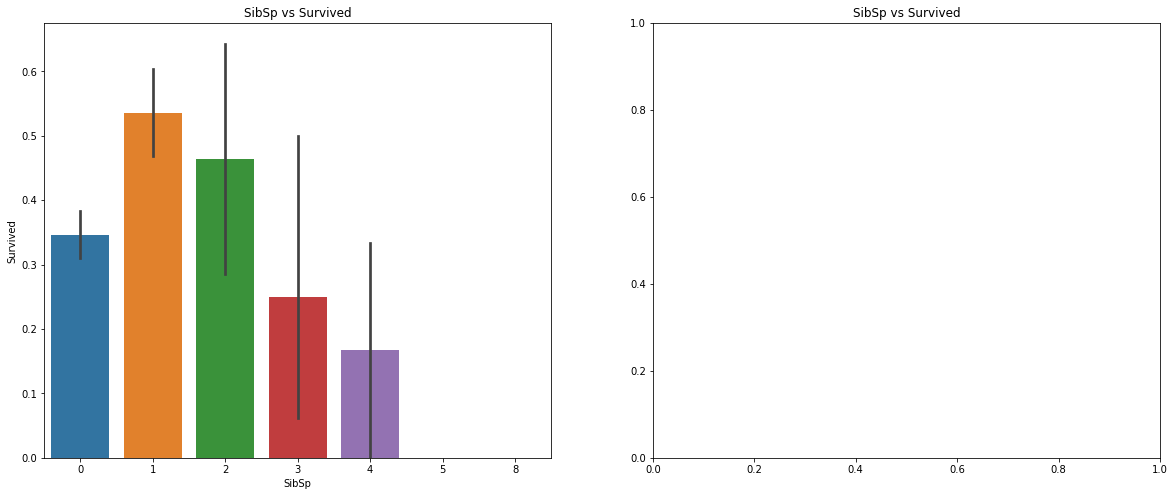

In [13]:
#함께 탑승한 형제 또는 배우자의 수
#0명~8명 
#정확하게 이해가 가지는 않음 

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [14]:
#함께 탑승한 부모 또는 자녀의 수
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


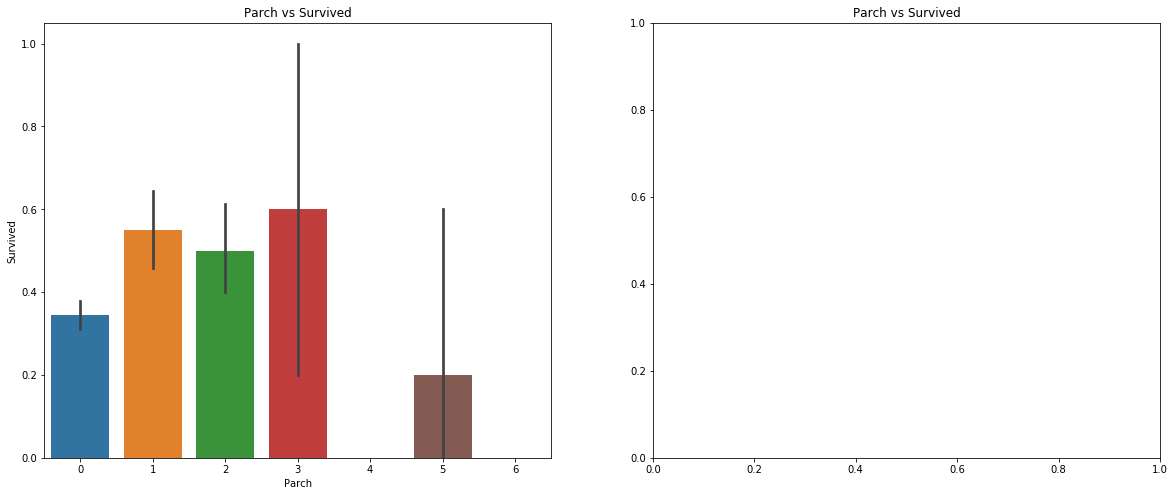

In [15]:
#함께 탑승한 부모 또는 자녀의 수
#0명~6명
#정확하게 이해가 가지는 않음 

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [16]:
#가장 비싼 티켓 가격
print('Highest Fare was:',data['Fare'].max())
#가장 싼 티켓 가격
print('Lowest Fare was:',data['Fare'].min())
#티켓 가격 평균 
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


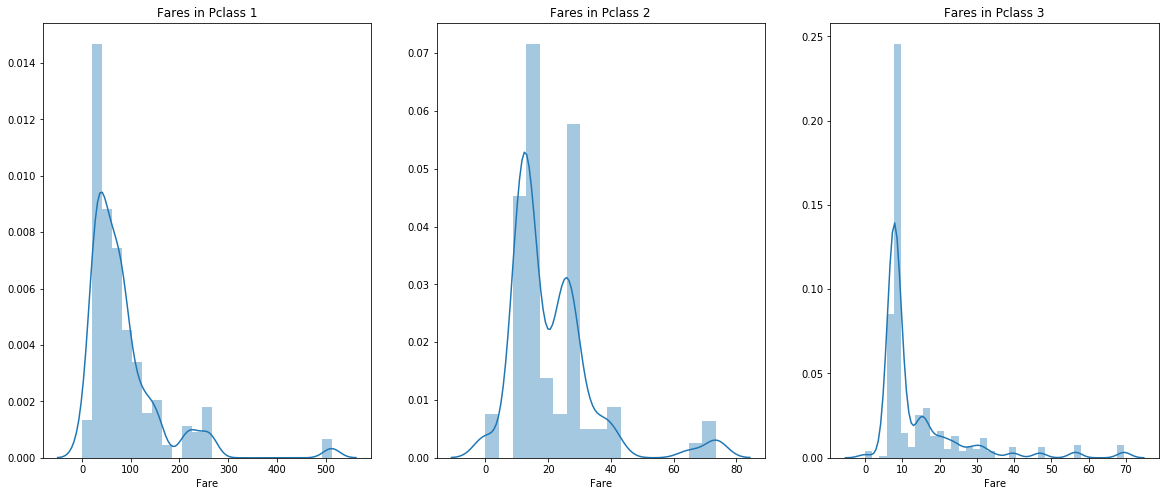

In [19]:
#1등급 좌석 가격별 그래프
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

#2등급 좌석 가격별 그래프
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

#3등급 좌석 가격별 그래프
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

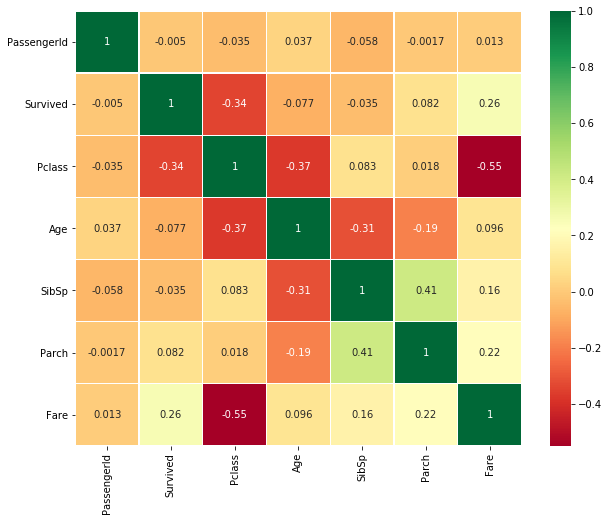

In [6]:
#히트맵 만들기 
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [5]:
#Age band별로 등급 설절

data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
